# Assignment #1 - Basic Data Exploration, Visualization, and Analysis

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Grading

This assignment will be graded in two portions:
<ul>
<li> 50% - Correctness and functionality. Parts of the assignment (the functions you are asked to write) will be graded on whether they work correctly and generate correct answers. </li>
<li> 50% -Analysis and presentation. Parts of the assignment (the markdown cells you are asked to fill in) will be graded on whether they present the answers clearly, and whether the analysis is correct. </li>
</ul>

## Load Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import asn1_function_sheet as afs

try:
    df = pd.read_csv("LabourTrainingEvaluationData.csv")
except FileNotFoundError:
    df = pd.read_csv("../data/LabourTrainingEvaluationData.csv")
df["Nodeg"].astype('category', copy=False)
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [3]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


### Part 1

<ol>
<li> Create a function called age_splitter that takes a dataframe, a column name, and an age threshold as input. The function should return two dataframes, one with all the rows where the age in the specified column is below the threshold, and one with all the rows where the age in the specified column is above or equal to the threshold. </li>
<li> Use this function to calculate the percentage of people in the dataset that are below 30 years old. </li>
<li> Use this function to compare the 1978 earnings of the two groups to see which is larger - show this arithmatically as well as visually. </li>
</ol>

The pecentage of people who are below 30 years old in the dataset is:  44.7224 %
Mean earnings (below 30) is 13032.69
Mean earnings (30 and above) is 16314.25
Older group(above 30 years old) earned more on average in 1978.


<Axes: xlabel='Earnings_1978', ylabel='Count'>

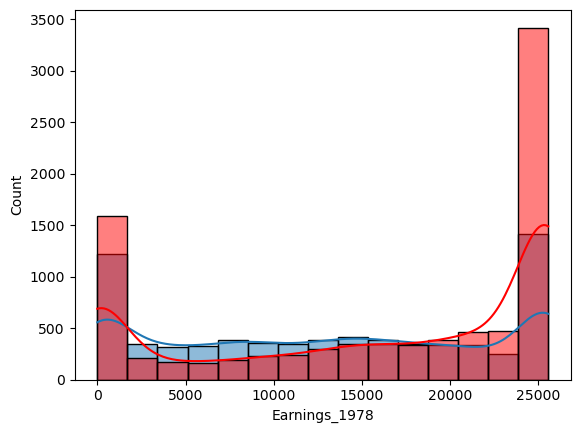

In [17]:
# 1 - Demo of function
def age_splitter(df, col_name, age_threshold):
    df_below = df[df[col_name] < age_threshold]
    df_above_equal = df[df[col_name] >= age_threshold]
    return df_below, df_above_equal

# 2 Percentage Under 30
below_30, above_30 = age_splitter(df, 'Age', 30)
percent_below_30 = (below_30.shape[0] / df.shape[0]) * 100
print('The pecentage of people who are below 30 years old in the dataset is: ',round(percent_below_30,4),'%')

# 3 - 1978 Earnings Comparison
## arithmatically
mean_earnings_below = below_30['Earnings_1978'].mean()
mean_earnings_above = above_30['Earnings_1978'].mean()

print("Mean earnings (below 30) is",  round(mean_earnings_below,2))
print("Mean earnings (30 and above) is",  round(mean_earnings_above,2))

if mean_earnings_below > mean_earnings_above:
    print("Younger group(below 30 years old) earned more on average in 1978.")
else:
    print("Older group(above 30 years old) earned more on average in 1978.")

## visually

sns.histplot(below_30['Earnings_1978'], kde='True',label='Age below 30')
sns.histplot(above_30['Earnings_1978'], kde=True, color='red',label='Age above 30')





### Part 2

<ol>
<li>Create a function in the .py file called cohortCompare that takes two arguments - a dataframe and a list of categorical column names. The function should return a dictonary of the key statistics of each numerical columns and counts for categorical columns.</li>
    <ul>
    <li> Mean, Median, Standard Deviation, Min, Max for numerical columns </li>
    <li> Counts for categorical columns </li>
    <li><b>Note:</b> Please use the CohortMetric object to store and manage the statistics for each cohort.</li>
    </ul>
<li> Does this data, at a high level, appear to be representative of the general population of the US in the late 70s? Does it now? Why or why not? </li>
    <ul>
    <li> This does not need to be a long answer or done in increadable depth. This question will generate some demographic profiles of people in the data - does that appear to be similar to the US population at the time? </li>
    <li> Please state how you assessd this. (There isn't one correct answer, the process is more important than the answer) </li>
    </ul>
<li>Print the dictionary returned in a nice-ish way. (Don't go crazy, basic formatting)</li>
</ol>

In [19]:
# 1 - Demo of function
class CohortMetric():
    # don't change this
    def __init__(self, cohort_name):
        self.cohort_name = cohort_name
        self.statistics = {
            "mean": None,
            "median": None,
            "std": None,
            "min": None,
            "max": None
        }
    def setMean(self, new_mean):
        self.statistics["mean"] = new_mean
    def setMedian(self, new_median):
        self.statistics["median"] = new_median
    def setStd(self, new_std):
        self.statistics["std"] = new_std
    def setMin(self, new_min):
        self.statistics["min"] = new_min
    def setMax(self, new_max):
        self.statistics["max"] = new_max

    def compare_to(self, other):
        for stat in self.statistics:
            if not self.statistics[stat].equals(other.statistics[stat]):
                return False
        return True
    def __str__(self):
        output_string = f"\nCohort: {self.cohort_name}\n"
        for stat, value in self.statistics.items():
            output_string += f"\t{stat}:\n{value}\n"
            output_string += "\n"
        return output_string


##cohortcompare function
def cohortCompare(df, categorical_columns):
    result = {}

    for col in df.columns:
        cohort = CohortMetric(cohort_name=col)

        # Check if column is numeric using dtype
        if df[col].dtype in ['int64', 'float64']:
            cohort.setMean(df[col].mean())
            cohort.setMedian(df[col].median())
            cohort.setStd(df[col].std())
            cohort.setMin(df[col].min())
            cohort.setMax(df[col].max())
        elif col in categorical_columns:
            counts = df[col].value_counts().to_dict()
            cohort.statistics = counts  # Replace stats with counts for categorical

        result[col] = cohort

    return result

    

# 2 - Comparison (you could also use a markdown cell  for this!!!)
#/*
# Based on the cohort statistics, the data seems to reflect a working-age population in the U.S. during 
# the late 1970s. The mean age is around 33, and earnings in 1975 average about $13,650, which aligns with
# the economic conditions of the time — a period when wages were relatively strong before the inflation 
# spikes of the early 1980s. Education and marital status distributions also match general demographic patterns.
#*/
# Define your list of categorical columns
categorical_columns = ["Age", "Earnings_1978","Earnings_1974", "Eduacation","MaritalStatus"]

# Run the function on your DataFrame
metrics = cohortCompare(df, categorical_columns)
# Print the output in a clean, readable format
for col_name, metric in metrics.items():
    print(metric)


Cohort: Age
	mean:
33.2252376188094

	median:
31.0

	std:
11.045215777717043

	min:
16

	max:
55



Cohort: Eduacation
	HighSchool:
6252

	LessThanHighSchool:
4731

	Intermediate:
2708

	graduate:
1367

	PostGraduate:
934



Cohort: Race
	mean:
None

	median:
None

	std:
None

	min:
None

	max:
None



Cohort: Hisp
	mean:
None

	median:
None

	std:
None

	min:
None

	max:
None



Cohort: MaritalStatus
	Married:
11382

	NotMarried:
4610



Cohort: Nodeg
	mean:
0.2958354177088544

	median:
0.0

	std:
0.4564316492829154

	min:
0

	max:
1



Cohort: Earnings_1974
	mean:
14016.800304192097

	median:
15123.58

	std:
9569.795893380959

	min:
0.0

	max:
25862.32



Cohort: Earnings_1975
	mean:
13650.803376072598

	median:
14557.11

	std:
9270.403224861113

	min:
0.0

	max:
25243.55



Cohort: Earnings_1978
	mean:
14846.659672907264

	median:
16421.975

	std:
9647.391524355906

	min:
0.0

	max:
25564.67




### Part 3

<ol>
<li> Create a function in the .py file called effectSizer that takes in a dataframe, a numerical column name, a column name of a categorical value that is binary (two values only), and returns a dictionary of the categorical classes and their corresponding effect sizes on the numerical value. </li>
<li> For 1978, which of Race, Hisp, MaritalStatus have the largest effect size. (Use Yes/True/1 for x1)</li>
</ol>

In [21]:
# 1. Demo of function

def cohenEffectSize(group1, group2):
    """
    Calculates Cohen's d effect size between two numerical groups.

    Parameters:
        group1 (pd.Series): First numerical group.
        group2 (pd.Series): Second numerical group.

    Returns:
        float: Cohen's d value.
    """
    mean1=group1.mean() 
    mean2 =group2.mean()
    var1=group1.var()
    var2=group2.var()
    
    n1 = len(group1)
    n2 = len(group2)

    # Pooled standard deviation
    pooled_var = (n1*var1 + n2*var2) / (n1 + n2 )
    

    d=(mean1 - mean2) / np.sqrt(pooled_var)
    return d
def effectSizer(df, num_col, cat_col):
    """
    Computes Cohen's d effect size for each class in a binary categorical column
    with respect to a numerical column.

    Parameters:
        df (pd.DataFrame): Input dataframe.
        num_col (str): Name of the numerical column.
        cat_col (str): Name of the binary categorical column.

    Returns:
        dict: Dictionary with categorical classes as keys and effect sizes as values.
    """
    classes = df[cat_col].unique()
    if len(classes) != 2:
        raise ValueError("Categorical column must have exactly two unique values.")

    group1 = df[df[cat_col] == classes[0]][num_col]
    group2 = df[df[cat_col] == classes[1]][num_col]

    effect_size = cohenEffectSize(group1, group2)

    return {
        str(classes[0]): effect_size,
        str(classes[1]): -effect_size  # inverse effect for the other class
    }

# Effect sizes comparison
Race_effectsize = effectSizer(df, "Earnings_1978", "Race")
print(Race_effectsize)
Hisp_effect_size = effectSizer(df, "Earnings_1978", "Hisp")
print(Hisp_effect_size)
MaritalStatus_effectsize = effectSizer(df, "Earnings_1978", "MaritalStatus")
print(MaritalStatus_effectsize)
print("MaritalStatus has the largest effect size")







{'NotBlack': np.float64(0.3188325585908269), 'black': np.float64(-0.3188325585908269)}
{'NotHispanic': np.float64(0.1621028439556738), 'hispanic': np.float64(-0.1621028439556738)}
{'Married': np.float64(0.5737396692404497), 'NotMarried': np.float64(-0.5737396692404497)}
MaritalStatus has the largest effect size
